In [252]:
"""Initial Imports"""
import pandas as pd
import numpy as np
import re
import tweepy
import datetime
from pandas_datareader import data as web
from textblob import TextBlob
from sklearn.svm import SVR
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
consumer_key = "W8olFrRLK7Lt7BUh6YAbdSG4h"
consumer_secret = "izRdiwC73rntSdMdAQm2gL8zFNAHVLa99A8dI99w0Lz16jvNrx"

access_token = "620364433-Kj5up6bB6KLfl5wfmxxcAnWthse5o38P2MKABM00"
access_token_secret = "Faxxv0hb54KF7MmakQ8WZmvaCC5YIprcWhiOuEyQY2iLt"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

fetch_tweets=tweepy.Cursor(api.search, q="#TSLA",count=100, lang ="en",since="2019-9-25", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

data.to_csv("TeslaTweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
print("Created CSV")

Created CSV


In [224]:
##Read the data
data = pd.read_csv('tweets_data_old_elonmusk.csv')

In [225]:
cdata=pd.DataFrame(columns=['Date','Tweets'])
print(len(data))

3218


In [226]:
##clean up the tweets
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    cdata.sort_index()
    cdata.at[index,'Date'] =row["Date"]
    cdata.at[index,'Tweets']= my_new_string
    #index=index+1
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [227]:
#clubbed tweets date wise
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.at[indx,'Date']=get_date
        ccdata.at[indx,'Tweets']=get_tweet
        indx+=1
        get_tweet=" "

In [229]:
ccdata = pd.read_csv('Tesla_tweets_old.csv')
ccdata.head()

,Unnamed: 0,Date,Tweets
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...
1,1,9/28/2017,kevinroose Just another day in the office Fas...
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...
4,4,9/25/2017,Daimler Good Major improvements some unexpec...


% of positive tweets=  87.97814207650273
% of negative tweets=  12.021857923497267


[]

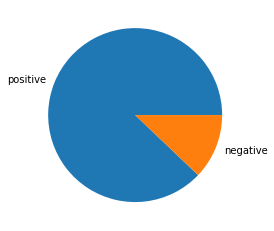

In [230]:
"""Doing Sentiment Analysis of tweets"""

ccdata['polarity'] = 0.0000
ccdata['confidence'] =0.0000
for index,row in ccdata.iterrows():
    analysis = TextBlob(ccdata['Tweets'][index])
    sentiment, confidence  = analysis.sentiment
    ccdata.at[index,'polarity'] = sentiment
    ccdata.at[index,'confidence'] = confidence
    
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata['polarity'][i]
    if(float(get_val)<(0)):
        nega=nega+1
    else:
        posi=posi+1
        
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
plt.pie(arr,labels=['positive','negative'])
plt.plot()

In [10]:
"""Get Stock Price From Yahoo using Pandas.dataReader"""

start = datetime.datetime(2012,10,26)
## Let's get Tesla stock data; Tesla's ticker symbol is TSLA
## First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, 
##fourth is the end date
tesla = web.DataReader('TSLA', 'yahoo', start)
#tesla.to_csv('TESLA_stock_price.csv')

In [212]:
read_stock_p=pd.read_csv('TESLA_stock_price.csv')
read_stock_p.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,10/26/2012,27.799999,27.020000,27.530001,27.379999,477400,27.379999
1,10/31/2012,28.350000,27.370001,27.700001,28.129999,775200,28.129999
2,11/1/2012,29.490000,28.200001,28.250000,29.250000,1024100,29.250000
3,11/2/2012,29.549999,28.549999,29.270000,28.920000,1030300,28.920000
4,11/5/2012,31.580000,29.330000,29.799999,31.500000,2048900,31.500000


In [232]:
"""Add the stock price value matching tweets for the day"""

ccdata['Prices']=""
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]             
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.at[i,'Prices']=int(read_stock_p.Close[j])
            break

In [13]:
"""Show that there are some empty fields for days when stock Market is closed"""

'Show that there are some empty fields for days when stock Market is closed'

In [256]:
ccdata.head(8)

,Unnamed: 0,Date,Tweets,polarity,confidence,Prices,percentchange
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,0.156151,0.432341,341,0.005865
1,1,9/28/2017,kevinroose Just another day in the office Fas...,0.500000,0.600000,339,-0.002950
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,-0.133333,0.233333,340,-0.014706
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,0.350000,0.300000,345,0.002899
4,4,9/25/2017,Daimler Good Major improvements some unexpec...,0.287500,0.700000,344,0.000000
5,9,9/16/2017,Richwsadler Does my hivemind count as me Bobb...,-0.125000,0.250000,344,-0.095930
6,11,9/14/2017,High res version at httpstcoYysKftHhoz jovani...,0.187143,0.305714,377,0.039788
7,13,9/12/2017,RT Gizmodo Hackers have already started to we...,-0.600000,1.000000,362,0.000000


In [234]:
"""Filling empty price with previous day price"""
for i in range(1,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
            ccdata.Prices.iloc[i]=int(ccdata.Prices.iloc[i-1])

#ccdata['Prices'] = ccdata['Prices'].apply(np.int64)


C:\Users\Kamakshi\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [216]:
ccdata.head(6)
len(ccdata)

549

In [235]:
"""Adding Percent change column in the dataset"""
ccdata['percentchange'] = 0.0000
print(len(ccdata))
for i in range(len(ccdata)-1,0,-1):
    ccdata.at[i-1,'percentchange']=float((ccdata.Prices.iloc[i-1]-ccdata.Prices.iloc[i])/ccdata.Prices.iloc[i-1])

#ccdata['percent change'] = ccdata['percent change'].apply(np.float)
ccdata.head()

549


,Unnamed: 0,Date,Tweets,polarity,confidence,Prices,percentchange
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,0.156151,0.432341,341,0.005865
1,1,9/28/2017,kevinroose Just another day in the office Fas...,0.500000,0.600000,339,-0.002950
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,-0.133333,0.233333,340,-0.014706
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,0.350000,0.300000,345,0.002899
4,4,9/25/2017,Daimler Good Major improvements some unexpec...,0.287500,0.700000,344,0.000000


In [87]:
ccdata.to_csv("Tesla_tweets_with_stocks_old.csv")

In [218]:
ccdata.head()

,Unnamed: 0,Date,Tweets,Prices,percentchange
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,341,0.005865
1,1,9/28/2017,kevinroose Just another day in the office Fas...,339,-0.002950
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,340,-0.014706
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,345,0.002899
4,4,9/25/2017,Daimler Good Major improvements some unexpec...,344,0.000000


In [257]:
"""train2 = pd.DataFrame(columns=['polarity','confidence','percentchange'])
for i in range(0,len(ccdata)):
    train2.at[i,'polarity'] = ccdata.polarity.iloc[i]
    train2.at[i,'confidence'] = ccdata.confidence.iloc[i]
    train2.at[i,'percentchange'] = ccdata.percent change.iloc[i]"""




"train2 = pd.DataFrame(columns=['polarity','confidence','percentchange'])\nfor i in range(0,len(ccdata)):\n    train2.at[i,'polarity'] = ccdata.polarity.iloc[i]\n    train2.at[i,'confidence'] = ccdata.confidence.iloc[i]\n    train2.at[i,'percentchange'] = ccdata.percent change.iloc[i]"

In [236]:
"""Parttion the data in train and test
Train the model with past four years data 
and predict the price change for next years"""

test1 = ccdata.iloc[0:199]
train1 = ccdata.iloc[200:549]

#train = train2.to_numpy()
train = train1.to_numpy()
test = test1.to_numpy()

X_train= np.array([x[3:5] for x in train])
y_train = np.array([x[-1] for x in train])

X_test= np.array([x[3:5] for x in test])
y_test = np.array([x[-1] for x in test])


len(y_test)
#y= np.array(ccdata['Prices'].values).astype(float)
#(X_train,X_test,y_train,y_test) = train_test_split(X, y, test_size=0.2, random_state=0)

199

In [247]:
newframe = pd.DataFrame(columns=['date','prediction'])
newframe

,date,prediction


In [254]:
"""1 SVR(rbf) Learner"""

rf = SVR(kernel= "rbf", C = 1e3 , gamma = 0.1)
rf.fit(X_train, y_train)
#prediction, bias, contributions = ti.predict(rf, X_test)
prediction = rf.predict(X_test)
rf.score(X_train,y_train)

-0.07523365159305762

In [255]:
"""1 Random Forest Learner"""

rf = RandomForestRegressor()

rf.fit(X_train, y_train)
#prediction, bias, contributions = ti.predict(rf, X_test)
prediction = rf.predict(X_test)
rf.score(X_test,y_test)

C:\Users\Kamakshi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-1.7868173696482503

In [248]:
for i in range(0,len(test)):
    newframe.at[i,'date'] = ccdata.Date.iloc[i]
    newframe.at[i,'prediction'] = prediction[i]
newframe.head()

,date,prediction
0,9/29/2017,0.0273855
1,9/28/2017,-0.01375
2,9/27/2017,-0.00122876
3,9/26/2017,0.0235048
4,9/25/2017,0.0167545


In [249]:
newframe['date']= pd.to_datetime(newframe['date'])
newframe.set_index('date', inplace = True)

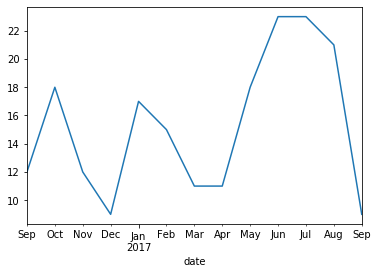

In [251]:
newframe.resample('1M').count()['prediction'].plot()

In [240]:
"""2 Another Learner"""
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(
    hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

nn.fit(X_train, y_train)
prediction = nn.predict(X_test)
rf.score(X_train,y_train)

0.6167565739405353

In [241]:
prediction = nn.predict(X_train)
rf.score(X_train,y_train)

0.6167565739405353

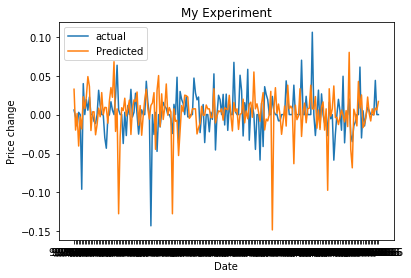

In [152]:
date_test = np.array([x[1] for x in test])
date_train = np.array([x[1] for x in test])
ccdata.resample('1M').count()['percentchange']
plt.plot(date_test,y_test, label="actual")
plt.plot(date_test,prediction, label="Predicted")
plt.xlabel('Date') 
plt.ylabel('Price change')
plt.title('My Experiment')
plt.legend()
plt.show()

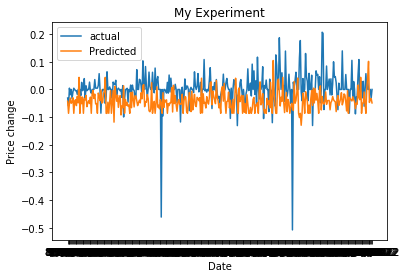

In [141]:
date_train = np.array([x[1] for x in train])
plt.plot(date_train,y_train, label="actual")
plt.plot(date_train,prediction, label="Predicted")
plt.xlabel('Date') 
plt.ylabel('Price change')
plt.title('My Experiment')
plt.legend()
plt.show()

In [160]:
test_start_date =  '9/29/2017'
test_end_date = '9/11/2016'
idx = pd.date_range(test_start_date, test_end_date)
test = ccdata.ix[test_start_date:test_end_date]
test

C:\Users\Kamakshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,Unnamed: 0,Date,Tweets,polarity,confidence,Prices,percentchange


In [163]:

import matplotlib.pyplot as plt
%matplotlib inline
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['percentchange'])

#prediction_df
#predictions_df['actual_value'] = test['percentchange']
#predictions_df.columns = ['predicted_price', 'actual_price']
#predictions_df.plot()

ValueError: Shape of passed values is (199, 1), indices imply (0, 1)

In [168]:
from pandas import Grouper
groups = ccdata.groupby(Grouper(key = "Date",freq='A'))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = ccdata.groupby(Grouper(freq='M'))
years = DataFrame()
for name, group in groups:
years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

In [171]:
ccdata['Date'] = pd.to_datetime(ccdata['Date'])
ccdata.set_index('Date', inplace = True)

KeyError: 'Date'

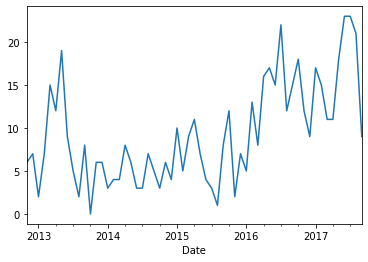

In [172]:
.resample('1M').count()['percentchange'].plot()